***Avant de continuer, assurez-vous d'avoir suivi la procédure pour faire fonctionner le kernel C de Jupyter (voir Moodle). La partie droite de la barre des menus de Jupyter doit ressembler à ceci :***

<center>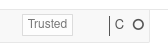<center>

La matière _Langage C_ est un petit module de trois séances au sein de l'UE Architecture - Système du second semestre. Il s'agit de la suite de la matière _Langage C_ du premier semestre (de l'UE Analyse de Données et Automatique). 

Le but du module est d'aborder des aspects avancés du langage C, que vous utiliserez (notamment) au cours de la matière de Systèmes d'Exploitation Centralisés, dans cette même UE.

Cette matière prend la forme de _classeurs Jupyter_, à lire/intéragir avec _en autonomie_ et <u>_en binôme_</u>. L'encadrant.e de TP est surtout là pour vous décoincer ou apporter des compléments sur le contenu du classeur.

Les classeurs sont locaux à vos machines, n'hésitez pas à les compléter, les modifier, etc. comme vous le voulez !

La matière Langage C est évaluée selon deux modalités :
  1. Un "projet" (court) à rendre en binôme, introduit dans le troisième et dernier classeur
  2. Un partiel, sous la forme d'un QCM de 30 minutes à correction automatique

*Ceci est le classeur numéro **1** de la matière Langage C du **2ème semestre**, à réaliser dans le temps de la première séance de Langage C.*

Ce premier classeur contient les points suivants :
 - Organisation de la mémoire
 - Allocation dynamique
   
Il se termine avec quelques petits exercices de mise en pratique. (Ces exercices ne sont pas à rendre mais vous pouvez bien sûr les envoyer à votre encadrant.e de TP pour qu'iel y jette un oeil).

_Note : tout au long du classeur, vous trouverez des [liens hypertextes](https://fr.wikipedia.org/wiki/Hyperlien) indiqués en bleu ; ils mènent généralement à des compléments d'information, pour votre culture personnelle !_

N'hésitez pas à consulter les classeurs précédents pour vous rafraîchir la mémoire !

## Rappels préliminaires

### Hexadécimal

Dans la suite de ce classeur, nous utiliserons extensivement le format _hexadécimal_ (ou _base 16_). On rappelle que l'hexadécimal est une façon de représenter les nombres à l'aide de 16 chiffres au lieu de 10. Les chiffres de l'hexadécimal sont les suivants :

 | Chiffre hexa | Valeur décimale | Valeur binaire |
 |--------------|-----------------|----------------|
 | `0`          | `0`             | `0000`         |
 | `1`          | `1`             | `0001`         |
 | `2`          | `2`             | `0010`         |
 | `3`          | `3`             | `0011`         |
 | `4`          | `4`             | `0100`         |
 | `5`          | `5`             | `0101`         |
 | `6`          | `6`             | `0110`         |
 | `7`          | `7`             | `0111`         |
 | `8`          | `8`             | `1000`         |
 | `9`          | `9`             | `1001`         |
 | `a`          | `10`            | `1010`         |
 | `b`          | `11`            | `1011`         |
 | `c`          | `12`            | `1100`         |
 | `d`          | `13`            | `1101`         |
 | `e`          | `14`            | `1110`         |
 | `f`          | `15`            | `1111`         |

Pour convertir un nombre hexadécimal $\overline{a_n a_{n-1} \ldots a_2 a_1 a_0}^{16}$ en nombre décimal, on utilise la formule de conversion de base :
$$ n = a_0 + a_1 \cdot 16 + a_2 \cdot 16^2 + \ldots + a_{n-1} \cdot 16^{n-1} + a_n \cdot 16^n$$

Pour convertir un nombre $n$ décimal en hexadécimal, on procède par divisions euclidiennes successives :
 + $n_0 = n$
 + $n_0 = 16 \cdot q_0 + n_1$
 + $n_1 = 16 \cdot q_1 + n_2$
 + ...
 + $n_{n - 1} = 16 \cdot q_{n - 1} + n_n$
 + $n_n = (0 \cdot 16) + q_n$

Le résultat est alors $n = \overline{q_n q_{n-1} \ldots q_2 q_1 q_0}^{16}$.

<br>

L'hexadécimal est très utilisé en informatique, car on y retrouve souvent des puissances de 2 (du fait que les ordinateurs manipulent des nombres en _binaire_). Typiquement, la mémoire est découpée en _octets_, donc en paquets de _8 bits_ ; or, tous les nombres représentables sur 8 bits peuvent s'écrire sur deux chiffres hexadécimaux (et chaque chiffre correspond à un "demi-octet", un quartet).
  | Binaire     | Hexadécimal | Décimal |
  |-------------|-------------|---------|
  | `0000 0000` | `00`        | `0`     |
  | `0000 0001` | `01`        | `1`     |
  | `0001 0000` | `10`        | `16`    |
  | `0101 0011` | `53`        | `83`    |
  | `1111 1111` | `ff`        | `255`   |

<br>

**Dans la suite de ce classeur, les nombres hexadécimaux seront préfixés de `0x` pour les séparer des nombres décimaux (sauf cas particuliers).**

**Le nombre `10` correspond donc bien au nombre 10 _en décimal_, et le nombre `0x10` au nombre 10 _en hexadécimal_ (donc 16 en décimal).**

En général et sauf mention contraire, les adresses de variables dans un programme sont _toujours données en hexadécimal_, pour des raisons que nous verrons plus tard.

### Variables et pointeurs

Le C manipule des variables. Une variable a un nom et un type, qui sont définis lors de sa _déclaration_ :
```c
int x;            // Déclaration d'une variable "x" de type "int"
struct test_t t;  // Déclaration d'une variable "t" de type "struct test_t" (enregistrement)
double d = 0.5;   // Déclaration-affectation d'une variable "d" de type "double"
```

Les variables sont concrètement des "cases" dans la mémoire, associées à une _adresse_. L'adresse d'une variable `x` de type `type` s'obtient avec l'opérateur unaire `&` : `&x`, et est de type `type*` ("pointeur sur `type`").
```c
int* ptr_x = &x;
struct test_t* ptr_t = &t;
double ptr_d* = &d;
```

On peut accéder, en écriture et en lecture, à la case pointée par un pointeur en le _déréférençant_, avec la syntaxe `*x`.
```c
*ptr_x = 5; // si ptr_x = &x, x vaut maintenant 5
printf("%f", *ptr_d); // afficher la valeur de la variable pointée par ptr_d
```

## Processus et organisation de la mémoire

Lorsque l'on exécute un programme, le système d'exploitation fait de la place dans la mémoire vive (allocation), et se sert d'une partie de la place allouée pour y charger le programme. Le reste de la place allouée contient principalement ce dont le programme a besoin (librairies, environnement, etc.), ainsi que deux zones de mémoire qui lui servent à stocker les données qu'il manipule (variables) : la **pile** et le **tas**.

La façon dont la mémoire est organisée est toujours la même. Pour s'en rendre compte, nous allons réaliser une petite expérience dans le terminal.

Dans un terminal, compilez le fichier `organisation.c` récupéré sur Moodle avec ce classeur, puis exécutez-le. Le programme affiche l'organisation de sa propre mémoire. Vous devriez obtenir quelque chose qui _ressemble_ à ceci :
```
~/TP_C> gcc organisation.c -o organisation
~/TP_C> ./organisation
Je suis le processus numéro 29766
   DÉBUT    -     FIN     PERM  OFFSET   DEV  INODE                     DESCRIPTION
555bb98b6000-555bb98b7000 r--p 00000000 fe:03 12066935                   /home/gdupont/TP_C/organisation
555bb98b7000-555bb98b8000 r-xp 00001000 fe:03 12066935                   /home/gdupont/TP_C/organisation
555bb98b8000-555bb98b9000 r--p 00002000 fe:03 12066935                   /home/gdupont/TP_C/organisation
555bb98b9000-555bb98ba000 r--p 00002000 fe:03 12066935                   /home/gdupont/TP_C/organisation
555bb98ba000-555bb98bb000 rw-p 00003000 fe:03 12066935                   /home/gdupont/TP_C/organisation
555bbaffc000-555bbb01d000 rw-p 00000000 00:00 0                          [heap]
7f79e1116000-7f79e1119000 rw-p 00000000 00:00 0
7f79e1119000-7f79e113f000 r--p 00000000 fe:01 157689                     /usr/lib/x86_64-linux-gnu/libc.so.6
7f79e113f000-7f79e1294000 r-xp 00026000 fe:01 157689                     /usr/lib/x86_64-linux-gnu/libc.so.6
7f79e1294000-7f79e12e7000 r--p 0017b000 fe:01 157689                     /usr/lib/x86_64-linux-gnu/libc.so.6
7f79e12e7000-7f79e12eb000 r--p 001ce000 fe:01 157689                     /usr/lib/x86_64-linux-gnu/libc.so.6
7f79e12eb000-7f79e12ed000 rw-p 001d2000 fe:01 157689                     /usr/lib/x86_64-linux-gnu/libc.so.6
7f79e12ed000-7f79e12fc000 rw-p 00000000 00:00 0
7f79e12fc000-7f79e12fd000 r--p 00000000 fe:01 135004                     /usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2
7f79e12fd000-7f79e1322000 r-xp 00001000 fe:01 135004                     /usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2
7f79e1322000-7f79e132c000 r--p 00026000 fe:01 135004                     /usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2
7f79e132c000-7f79e132e000 r--p 00030000 fe:01 135004                     /usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2
7f79e132e000-7f79e1330000 rw-p 00032000 fe:01 135004                     /usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2
7ffd0e0c3000-7ffd0e0e5000 rw-p 00000000 00:00 0                          [stack]
7ffd0e14b000-7ffd0e14f000 r--p 00000000 00:00 0                          [vvar]
7ffd0e14f000-7ffd0e151000 r-xp 00000000 00:00 0                          [vdso]
```

Le processus commence par donner son PID (son identifiant unique, affecté par l'OS), puis détaille la structure de sa mémoire, sous forme de blocs. Un bloc est une séquence contiguë d'emplacements mémoire, dont les adresses s'étalent entre les bornes données (de `DÉBUT` inclus à `FIN` exclus, données en hexadécimal). 

Les blocs sont associés à des permissions (`PERM`), à la manière des fichiers sur le disque dur, qui indiquent ce que l'on a le droit de faire avec : `r` (_read_) pour la lecture, `w` (_write_) pour l'écriture et `x` (_executable_) pour l'exécution. Le caractère `p` indique que le bloc est _privé_, donc pas partagé avec un autre processus. Enfin, la dernière colonne nous renseigne sur ce que contient le bloc (les autres colonnes sont un peu techniques à expliquer, et pas très intéressante dans le contexte présent, nous allons donc les ignorer).

Sur l'exemple ci-dessus, on observe d'abord des blocs avec pour description le chemin vers l'exécutable lancé (ici, `/home/gdupont/TP_C/organisation`). Ces blocs contiennent en fait le programme exécuté, et ses informations contextuelles (environnement, constantes, etc). On remarquera notamment qu'un bloc a la permission `x` (exécutable) : ce sont les instructions du programme !

Dans les autres blocs nommés, on remarquera les blocs `libc.so.6`, qui contiennent la _librairie C_ nécessaire à l'exécution des programmes C, et les blocs `ld-linux-x86-64.so.2`, qui contiennent ce qui permet au programme d'être relié à l'OS pour son exécution. De même, on remarquera que certains de ces blocs sont exécutables, car ils mettent à disposition du processus des _sous-programmes_.

Enfin, les deux blocs qui nous intéresseront le plus ici sont le bloc `[heap]` et le bloc `[stack]`. Le premier représente le _tas_, et le second représente la _pile_.


Si on schématise la structure de la mémoire, voilà le genre de schéma qu'on obtient :
<center>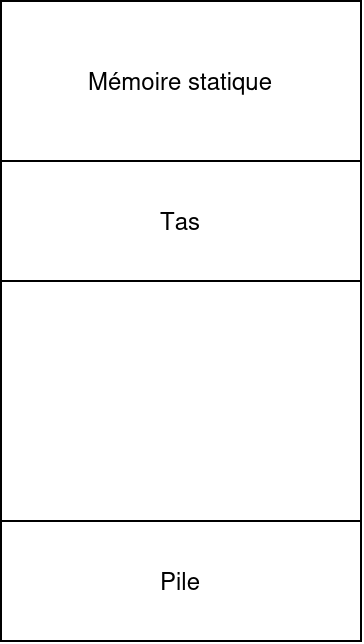</center>

On appellera mémoire "statique" les blocs destinés à stocker le programme et ses librairies. Cette mémoire ne change pas lors de l'exécution, d'où son nom.

### La pile

La pile est la zone mémoire utilisée par le programme pour toutes les variables que le programme déclare directement. L'évolution de la pile est connue _à la compilation_ (elle est calculée par le compilateur pour chaque instruction), ce qui permet à la pile d'être particulièrement homogène et contigüe, et donc d'être rapide en terme de temps d'accès.

La pile est caractérisée par son adresse de base (fixe) et par l'adresse de son _dessus_, que l'on appelle le _pointeur de pile_ (stack pointer). À chaque déclaration de variable, le système bouge le pointeur de pile de façon à dégager suffisamment d'espace libre pour la variable. La mémoire est allouée pour la variable et son adresse est la valeur courante du pointeur de pile.

Comme la pile est tout en bas de la zone mémoire, le pointeur de pile varie de manière _décroissante_.

<br>

Pour illustrer cela, regardons le code ci-dessous. On y déclare 4 variables entières, puis on affiche leurs adresses et leurs tailles respectives, dans l'ordre de déclaration. Notez l'utilisation de `%p` dans [`printf`](https://cplusplus.com/reference/cstdio/printf/) qui permet d'afficher une valeur sous forme d'adresse (en hexadécimal), et l'opérateur [`sizeof`](https://en.cppreference.com/w/cpp/language/sizeof) qui permet de connaître la taille d'un type (ou d'une variable de ce type).

In [12]:
#include <stdlib.h>
#include <stdio.h>

int main() {
    // Déclaration de 4 entiers dans la pile
    int w;
    int x;
    int y;
    int z;

    // %p permet d'afficher un pointeur (une adresse) sous forme hexadécimale
    printf("sommet de la pile = 0x%lx\n", (long)(&w) + sizeof(w));
    printf("@w = %p, taille = %d\n", &w, sizeof(w)); // Devrait être = sommet de la pile - 4 (taille d'un int = 4)
    printf("@x = %p, taille = %d\n", &x, sizeof(x)); // &w - 4
    printf("@y = %p, taille = %d\n", &y, sizeof(y)); // &x - 4
    printf("@z = %p, taille = %d\n", &z, sizeof(z)); // &y - 4
    
    return 0;
}

sommet de la pile = 0x7ffd97d09b60
@w = 0x7ffd97d09b5c, taille = 4
@x = 0x7ffd97d09b58, taille = 4
@y = 0x7ffd97d09b54, taille = 4
@z = 0x7ffd97d09b50, taille = 4


La façon dont le pointeur de pile évolue précisément prend également en compte le concept d'_alignement_. On dit qu'une variable est _alignée_ lorsque son adresse est divisible par sa taille. Autrement dit, lorsqu'une nouvelle variable est déclarée, le pointeur de pile avance d'au moins la taille nécessaire pour stocker la variable, puis avance encore jusqu'à tomber sur une adresse divisible par la taille de la variable.

In [18]:
//%cflags: -O0
#include <stdlib.h>
#include <stdio.h>

int main() {
    int a;     // taille = 4
    char b;    // taille = 1
    short c;   // taille = 2
    char d;    // taille = 1
    char e;    // taille = 1
    long f;    // taille = 8

    printf("sommet de la pile = 0x%lx\n", (long)(&a) + sizeof(a));
    printf("@a = %p, taille = %d\n", &a, sizeof(a)); // adresse divisble par 4 (termine en 0, 4, 8 ou c)
    printf("@b = %p, taille = %d\n", &b, sizeof(b)); // prochaine adresse > &a - 1 divisible par 1 (probablement &a - 1)
    printf("@c = %p, taille = %d\n", &c, sizeof(c)); // prochaine adresse > &b - 2 divisible par 2 (probablement &b - 3)
    printf("@d = %p, taille = %d\n", &d, sizeof(d)); // prochaine adresse > &c - 1 divisible par 1 (probablement &c - 1)
    printf("@e = %p, taille = %d\n", &e, sizeof(e)); // prochaine adresse > &d - 1 divisible par 1 (probablement &d - 1)
    printf("@f = %p, taille = %d\n", &f, sizeof(f)); // prochaine adresse > &e - 8 divisible par 8 (probabelement &e - 14)
    
    return 0;
}

sommet de la pile = 0x7ffeaca46020
@a = 0x7ffeaca4601c, taille = 4
@b = 0x7ffeaca4601b, taille = 1
@c = 0x7ffeaca46018, taille = 2
@d = 0x7ffeaca46017, taille = 1
@e = 0x7ffeaca46016, taille = 1
@f = 0x7ffeaca46008, taille = 8


On remarque qu'un défaut de cette approche est l'apparaition de blocs de mémoire qui ne seront jamais utilisés, ce que l'on pourrait appeler des _bulles d'air_ ou des blocs _morts_. C'est un sacrifice que l'on accepte en général, car le gain en temps est très substanciel par rapport à manipuler de la mémoire non-alignée (et sur certains CPU, les blocs alloués doivent impérativement être alignés).

Pour éviter les bulles d'air, il peut être intéressant de réordonner les déclarations pour agencer les blocs mémoire de manière astucieuse.

Reprenons l'exemple ci-dessus :

In [14]:
//%cflags: -O0
#include <stdlib.h>
#include <stdio.h>

int main() {
    int a;     // taille = 4
    char b;    // taille = 1
    char d;    // taille = 1   ==> d et c ont été échangés !
    short c;   // taille = 2
    long f;    // taille = 8   ==> e et f ont été échangés !
    char e;    // taille = 1

    printf("sommet de la pile = 0x%lx\n", (long)(&a) + sizeof(a));
    printf("@a = %p, taille = %d\n", &a, sizeof(a)); 
    printf("@b = %p, taille = %d\n", &b, sizeof(b)); 
    printf("@d = %p, taille = %d\n", &d, sizeof(d)); 
    printf("@c = %p, taille = %d\n", &c, sizeof(c)); 
    printf("@f = %p, taille = %d\n", &f, sizeof(f)); 
    printf("@e = %p, taille = %d\n", &e, sizeof(e)); 
    
    return 0;
}

sommet de la pile = 0x7ffd4a20d0a0
@a = 0x7ffd4a20d09c, taille = 4
@b = 0x7ffd4a20d09b, taille = 1
@d = 0x7ffd4a20d09a, taille = 1
@c = 0x7ffd4a20d098, taille = 2
@f = 0x7ffd4a20d090, taille = 8
@e = 0x7ffd4a20d08f, taille = 1


Le nombre de blocs nécessaires pour stocker ces 6 variables est de 17 (4 + 1 + 1 + 2 + 8 + 1). Dans le premier cas, la pile occupe 24 blocs (donc 7 blocs morts, presque un tiers !), dans le second cas, elle en occupe bien que 17, soit un taux "d'utilité" de 100%.

#### Enregistrements et tableaux

Lorsque le type de la variable déclarée est un enregistrement (`struct`), la variable est aussi allouée sur la pile. Tout se passe alors comme si on allouait une variable par champ, dans l'ordre et en commençant par le premier champ. L'ordre des champs a donc une influence sur l'allocation (les champs aussi doivent être alignés...), et donc sur la taille totale prise par l'enregistrement !

In [29]:
//%cflags: -O0
#include <stdlib.h>
#include <stdio.h>

struct test_1 {
    int a;
    char b;
    int c;
    char d;
};

struct test_2 {
    int a;
    int c; // On réordonne pour avoir les char côte-à-côte
    char b;
    char d;
};

int main() {
    struct test_1 t1;
    struct test_2 t2;

    printf("@t1 = %p, taille = %d\n", &t1, sizeof(t1));
    printf("@t1.a = %p\n", &(t1.a)); // remarquez que l'adresse de l'enregistrement et l'adresse du premier champ coïncident !
    printf("@t1.b = %p\n", &(t1.b));
    printf("@t1.c = %p\n", &(t1.c));
    printf("@t1.d = %p\n", &(t1.d));

    printf("@t2 = %p, taille = %d\n", &t2, sizeof(t2));
    printf("@t2.a = %p\n", &(t2.a));
    printf("@t2.c = %p\n", &(t2.c));
    printf("@t2.b = %p\n", &(t2.b));
    printf("@t2.d = %p\n", &(t2.d));

    return 0;
}

@t1 = 0x7ffd5c7c3850, taille = 16
@t1.a = 0x7ffd5c7c3850
@t1.b = 0x7ffd5c7c3854
@t1.c = 0x7ffd5c7c3858
@t1.d = 0x7ffd5c7c385c
@t2 = 0x7ffd5c7c3844, taille = 12
@t2.a = 0x7ffd5c7c3844
@t2.c = 0x7ffd5c7c3848
@t2.b = 0x7ffd5c7c384c
@t2.d = 0x7ffd5c7c384d


Lorsque la variable est d'un type tableau et allouée normalement, elle est stockée dans la pile. Tout se passe comme si on allouait une variable par case du tableau. Petit détail : les adresses du tableau sont en ordre croissantes, comme si on allouait les variables en commençant par la fin (la case d'indice 0 est donc la plus proche du haut de la pile).

In [30]:
//%cflags: -O0
#include <stdlib.h>
#include <stdio.h>

int main() {
    short test[5]; // 5 short (taille = 2) => taille = 10
    int x;

    printf("@test = %p, taille = %d\n", &test, sizeof(test));
    printf("@test[0] = %p\n", &(test[0])); // L'adresse du tableau et de sa première case coïncident
    printf("@test[1] = %p\n", &(test[1]));
    printf("@test[2] = %p\n", &(test[2]));
    printf("@test[3] = %p\n", &(test[3]));
    printf("@test[4] = %p\n", &(test[4]));
    printf("@x = %p\n", &x); // adresse = prochain multiple de 4 > &test - 4, probablement &test - 6
    
    return 0;
}

@test = 0x7fff5a31cbb6, taille = 10
@test[0] = 0x7fff5a31cbb6
@test[1] = 0x7fff5a31cbb8
@test[2] = 0x7fff5a31cbba
@test[3] = 0x7fff5a31cbbc
@test[4] = 0x7fff5a31cbbe
@x = 0x7fff5a31cbb0


#### Pile et sous-programmes

Il faut savoir que la pile est locale au sous-programme courant. Lorsqu'on appelle un nouveau sous-programme, celui-ci a sa propre pile, qui est désallouée à la fin dudit sous-programme. Cela permet d'offrir une forme de _ségrégation_ de la mémoire, pour des raisons de sécurité : le sous-programme appelé ne peut pas accéder à la mémoire de l'appelant, et vice et versa.

In [21]:
//%cflags: -O0
#include <stdlib.h>
#include <stdio.h>

void sp_1() {
    int a;
    printf("@sp_1:a = %p\n", &a);
}

void sp_3(char c);
void sp_2(short a) {
    int b;
    printf("@sp_2:a = %p\n", &a); // Les paramètres aussi ont une adresse !
    printf("@sp_2:b = %p\n", &b); // Il y a des chances que la case pour a de sp_1 soit réutilisée
    sp_3(0);
}

void sp_3(char c) {
    int d;
    printf("@sp_3:c = %p\n", &c);
    printf("@sp_3:d = %p\n", &d);
}

int main() {
    int a;
    printf("@main:a = %p\n", &a);
    sp_1();
    sp_2(0);

    return 0;
}

@main:a = 0x7fff6f9485dc
@sp_1:a = 0x7fff6f9485bc
@sp_2:a = 0x7fff6f9485ac
@sp_2:b = 0x7fff6f9485bc
@sp_3:c = 0x7fff6f94857c
@sp_3:d = 0x7fff6f94858c


Une conséquence directe de ce comportement est qu'une fonction ne doit **jamais** renvoyer un pointeur sur une variable dans la pile. Comme la case mémoire associée au pointeur est désallouée à la fin de la fonction, l'adresse renvoyée devient _invalide_ : la déréférencer a toutes les chances de causer un crash, ou au moins un comportement indéfini.

In [24]:
//%cflags: -O0
#include <stdlib.h>
#include <stdio.h>

int* gimme() {
    int a = 5;
    return &a; // Cette ligne doit générer un warning
}

int main() {
    int* x = gimme();
    *x = 6; // Ça va très probablement crasher...
    printf("*x = %d\n", *x);

    return 0;
}

/tmp/tmp2uzre9hm.c: In function ‘gimme’:
/tmp/tmp2uzre9hm.c:7:12: warning: function returns address of local variable [-Wreturn-local-addr]
    7 |     return &a; // Cette ligne doit générer un warning
      |            ^~
[C kernel] Executable exited with code -11

### Le tas

Les bonnes propriétés de la pile (et notamment sa rapidité) viennent du fait qu'on _connaît son évolution à la compilation_. Cela nécessite de connaître, à chaque point du code, la taille des variables nécessaires au programme, et cette taille _ne peut jamais varier_ durant l'exécution du programme.

Or, en informatique, la quantité de mémoire nécessaire n'est pas toujours connue autant à l'avance. Par exemple, on peut vouloir stocker une chaîne de caractères manipulée par l'utilisateur, et qui peut donc augmenter en taille à mesure que l'utilisateur ajoute des caractères. On pourrait limiter la taille une fois pour toute, mais cela pourrait pénaliser l'utilisation du programme.

Pour tous les cas où on a besoin de données sans connaître la taille, on utilise alors plutôt le _tas_. Contrairement à la pile, l'évolution du tas n'est pas connue à la compilation, et change donc d'une exécution à l'autre. Comme son nom le suggère, les adresses n'y sont par ailleurs pas vraiment rangées.

L'allocation dans la pile est automatique. En revanche, pour allouer de la mémoire dans le tas, on doit utiliser des fonctions spéciales dites _d'allocation_ : [`malloc`](https://cplusplus.com/reference/cstdlib/malloc/), [`calloc`](https://cplusplus.com/reference/cstdlib/calloc/) et [`realloc`](https://cplusplus.com/reference/cstdlib/realloc/) (clicker sur les noms de fonction pour accéder à la doc).

Par ailleurs, contrairement à des langages de plus haut niveau comme Java, C ne gère absolument pas la mémoire en-dehors de ce que spécifie l'utilisateur. Autrement dit, une fois qu'on a fini avec un bloc, il **faut le désallouer soi-même**, en utilisant la fonction [`free`](https://cplusplus.com/reference/cstdlib/free/).

#### `malloc` et `free`

```c
// Prototypes de malloc et free
void* malloc(size_t size);
void free(void* ptr);
```

La fonction `malloc` (pour _memory allocation_) permet d'allouer un bloc de mémoire _contigu_ dans le tas, de taille demandée (en octets). Cette fonction retourne un pointeur : c'est l'adresse de début du bloc nouvellement alloué. Comme `malloc` n'a aucune idée de ce à quoi va servir le bloc, le type de retour est `void*`, autrement dit un pointeur sans plus d'information. En général, on _cast_ ce pointeur vers le type requis (par exemple pour allouer des entiers : `(int*)malloc(...)`).

La taille du bloc est donnée en octet pour permettre d'allouer précisément ce dont on a besoin. Pour allouer $n$ variables de type $t$, on va donc demander une taille de $n \times \text{sizeof}(t)$ octets. À noter que `malloc` utilise le type `size_t`, qui est en fait un type d'entiers adapté aux tailles de blocs.

Dans le cas où `malloc` n'a pas fonctionné (parce que la taille est invalide ou parce qu'il n'y a plus de place dans le tas), la fonction retourne `NULL`. On notera que donner une taille nulle ou négative à `malloc` à un comportement _indéfini_ (= on ne peut pas savoir ce que ça fait) ; concrètement, on ne fait jamais ça.

<br>

Comme dit ci-avant, lorsqu'on a fini de travailler avec le bloc de mémoire alloué, on doit le _désallouer_ (ou _libérer_) en utilisant la fonction `free`. Cette fonction prend en paramètre le pointeur vers le début du bloc alloué par `malloc`.

Après libération de la zone mémoire allouée, on dit que le pointeur associé devient _invalide_, car le déréférencer conduirait à une erreur. Plus généralement, un pointeur est _valide_ entre un appel à `malloc` réussi et l'appel à `free` correspondant, et _invalide_ partout ailleurs.

In [78]:
#include <stdlib.h>
#include <stdio.h>

int main() {
    int taille = 4;
    int* tab = (int*)malloc(taille * sizeof(int)); // Allouer "taille" entiers
    printf("@taille = %p\n", &taille);
    printf("@tab = %p\n", tab);

    // À part ça, on utilise tab comme un tableau normal
    tab[0] = 1;
    tab[1] = 2;
    tab[2] = tab[0] + tab[1];
    printf("tab[2] = %d\n", tab[2]);

    // Ne pas oublier free !
    free(tab);

    return 0;
}

@taille = 0x7ffebc724994
@tab = 0x55cf57297850
tab[2] = 3


On remarquera l'adresse retournée par `malloc` dans le tas en `0x5...`, très très loin de l'adresses de `taille` dans la pile, en `0x7ff...`.

Bien sûr on peut utiliser `malloc` pour allouer n'importe quoi, dont des enregistrements !

In [25]:
#include <stdlib.h>
#include <stdio.h>

struct point_t {
    float x, y;
};

int main() {
    int taille = 10;
    struct point_t* pts = (struct point_t*)malloc(taille * sizeof(struct point_t));
    printf("@pts = %p\n", pts);
    for (int i = 0; i < taille; i++) {
        pts[i].x = i * 2.0 + 1.0;
        pts[i].y = i + 2.0;
    }

    for (int i = 0; i < taille; i++) {
        printf("pts[%d] = (%5.2f,%5.2f)\n", i, pts[i].x, pts[i].y);
    }

    free(pts);
    
    return 0;
}

@pts = 0x55ace92f7180
pts[0] = ( 1.00, 2.00)
pts[1] = ( 3.00, 3.00)
pts[2] = ( 5.00, 4.00)
pts[3] = ( 7.00, 5.00)
pts[4] = ( 9.00, 6.00)
pts[5] = (11.00, 7.00)
pts[6] = (13.00, 8.00)
pts[7] = (15.00, 9.00)
pts[8] = (17.00,10.00)
pts[9] = (19.00,11.00)


**Note :** `malloc` ne fait que de l'allocation. De même qu'on ne peut pas pas présupposer du contenu d'une variable déclarée mais non affectée, impossible de savoir ce qu'il y a dans les blocs alloués juste après le `malloc`... Il faut donc éviter d'utiliser des blocs alloués mais jamais initialisés !

#### `calloc`

```c
void* calloc(size_t num, size_t size);
```

La fonction `calloc` est une variante de `malloc`, qui fait essentiellement la même chose à deux différences près :
 1. Au lieu de donner directement la taille en octet, on donne le nombre d'éléments alloués (`num`) et la taille d'un éléménet (`size`) ;
 2. Les blocs alloués par `calloc` **sont mis à 0**

Dit autrement, faire `x = calloc(n, s)` est équivalent à faire `x = malloc(n * s)` puis `x[i] = 0` pour chaque `i = 0..n-1`. C'est une sorte de raccourci pratique, qui en plus est souvent implémenté plus rapidement que si on le faisait à la main avec une boucle.

Bien sûr, il faut que la notion de "mettre à 0" ait un sens... `calloc` est donc pas mal adaptée pour tout ce qui est type numérique.

<br>

`calloc` étant une variante de `malloc`, cela ne nous dispense pas de faire un `free` après ! De même, donner la valeur 0 à l'un des deux paramètres conduit à un comportement _indéfini_, à éviter absolument donc.

In [26]:
#include <stdlib.h>
#include <stdio.h>

int main() {
    int taille = 5;
    int* entiers = (int*)calloc(taille, sizeof(int));
    float* flottants = (float*)calloc(taille, sizeof(float));

    printf("@entiers = %p\n", entiers);
    printf("@flottants = %p\n", flottants);

    for (int i = 0; i < taille; i++) {
        printf("entiers[%d] = %d, flottants[%d] = %f\n", i, entiers[i], i, flottants[i]);
    }

    free(entiers);
    free(flottants);

    return 0;
}

@entiers = 0x558ff1a3d180
@flottants = 0x558ff1a3d1a0
entiers[0] = 0, flottants[0] = 0.000000
entiers[1] = 0, flottants[1] = 0.000000
entiers[2] = 0, flottants[2] = 0.000000
entiers[3] = 0, flottants[3] = 0.000000
entiers[4] = 0, flottants[4] = 0.000000


#### `realloc`

```c
void* realloc(void* ptr, size_t size);
```

La fonction `realloc` permet de changer la taille allouée du bloc dans le tas associé au pointeur donné. Cela permet d'adapter la quantité de blocs alloués en fonction de l'usage : on peut l'augmenter lorsqu'on a besoin de plus de place, ou la diminuer pour faire de la place à d'autres variables.

`realloc` prend en paramètre le pointeur du début de la zone dont on veut modifier la taille ainsi que la nouvelle taille que l'on désire. La fonction retourne alors le pointeur du début de la zone. **Ces pointeurs ne sont pas toujours identiques !** En revanche, on est assuré que le _contenu_ des blocs **reste inchangé** du début de la zone jusqu'à la fin du bloc initial (si la taille a augmenté) ou jusqu'à la fin de la nouvelle zone (si la taille a diminué).

On a en fait 3 cas de figure :
  1. `realloc` a réussi à redimensionner le bloc mémoire à l'adresse donnée ; la fonction retourne alors cette même adresse
  2. `realloc` n'a pas réussi à redimensionner le bloc mémoire à l'adresse donnée, et a réalloué un bloc de la taille demandée _ailleurs_, puis a libéré le bloc original ; la fonction retourne alors l'adresse du début de la nouvelle zone (et l'ancien pointeur devient _invalide_)
  3. `realloc` n'a pas du tout réussi à réaliser la réallocation ; la fonction retourne `NULL`, mais l'ancienne zone allouée est toujours valide (elle ne devient pas invalide)

La bonne façon d'utiliser `realloc` est de stocker le résultat dans une variable temporaire, et de réaffecter la variable de travail si cette variable ne vaut pas `NULL` :

```c
...
int* tmp = (int*)realloc(variable, taille); // Réallouer la zone associée à "variable"

if (tmp != NULL) {
    variable = tmp;
} else {
    // Notification de l'utilisateur ou code alternatif
}
```

In [45]:
#include <stdlib.h>
#include <stdio.h>

void afficher_tab(int* tab, int taille) {
    puts("tab:");
    for (int i = 0; i < taille; i++) {
        printf("- tab[%d] = %d\n", i, tab[i]);
    }
}

int main() {
    int taille = 5;
    int* tab = (int*)malloc(taille * sizeof(int));

    for (int i = 0; i < taille; i++) {
        tab[i] =  2 * i + 1;
    }

    afficher_tab(tab, taille);

    taille = 8; // on redimensionne vers un tableau plus grand
    int* tmp = (int*) realloc(tab, taille);
    if (tmp != NULL) {
        tab = tmp;
    } else {
        puts("La réallocation ne s'est pas bien passée :|");
    }

    afficher_tab(tab, taille); // Les 3 dernières cases sont random mais les 5 premières sont ok

    taille = 3; // on redimensionne vers un tableau plus petit
    tmp = (int*) realloc(tab, taille);
    if (tmp != NULL) {
        tab = tmp;
    } else {
        puts("La réallocation ne s'est pas bien passée :|");
    }

    afficher_tab(tab, taille);

    free(tab); // On n'oublie pas de free !!!!

    return 0;
}

tab:
- tab[0] = 1
- tab[1] = 3
- tab[2] = 5
- tab[3] = 7
- tab[4] = 9
tab:
- tab[0] = 1
- tab[1] = 3
- tab[2] = 5
- tab[3] = 7
- tab[4] = 9
- tab[5] = 0
- tab[6] = 2321
- tab[7] = 0
tab:
- tab[0] = 1
- tab[1] = 3
- tab[2] = 5


Petit point de détail sur `realloc` : si le pointeur en paramètre est `NULL`, alors `realloc` renvoie un nouveau pointeur sur une zone allouée de taille demandée. Dans ces conditions, `realloc(NULL, n)` se comporte exactement comme `malloc(n)` !

Autre point : si la taille demandée est nulle, alors `realloc` désalloue la zone associée au pointeur. Autrement dit, `realloc(ptr, 0)` est équivalent à faire `free(ptr)`.

Dans le cas où le pointeur est `NULL` et la taille est 0, le comportement est indéfini.

#### Conseils et choses à ne pas faire

L'allocation dynamique de mémoire en C est la cause principale de crash et de bugs divers, qu'il est parfois difficile de tracker.

Voici une petite liste de choses à faire et à ne pas faire pour éviter les problèmes. Si votre programme crash (en particulier avec une erreur -6 ou -11), référez vous à cette liste pour vérifiez que vous avez bien géré la mémoire correctement.
  1. Ne jamais déréférencer un pointeur déclaré mais pas affecté (et ne jamais déréférencer `NULL`).
  2. Ne jamais faire `free` sur un pointeur pas affecté, sur `NULL` ou sur un pointeur qui a déjà été libéré.
  3. Ne jamais faire `free` sur une adresse qui n'est pas une adresse de début (par ex. `free(t[2])` au lieu de `free(t)`).
  4. Éviter de donner la taille en dur dans `malloc`, et toujours utiliser `sizeof` pour récupérer la taille d'un élément à allouer.
  5. Ne jamais retourner un pointeur vers une adresse dans la pile.

## À vous de jouer !

_Note : les exercices 2 et 3 utilisent la librairie de tests `libtest`, fournie avec les classeurs ; assuez-vous d'avoir bien dans le dossier les fichiers `tests.h` et `libt.a`_

### 1. Échauffement

Dans le programme suivant, on récupère un nombre aléatoire entre 1 et 6, stocké dans la variable `n`. Programmer les étapes suivantes :
 1. Allouer un tableau de `double` de taille `n + 1`
 2. Affecter à chaque case `d[i]` (i = 0..n + 1) du tableau la valeur `i / n`
 3. Afficher les cases du tableau à la suite : on doit voir un découpage régulier de l'intervalle $[0,1]$. Par exemple, si n = 4, on doit voir apparaître
    ```
    0.000000 0.250000 0.500000 0.750000 1.000000
    ```
 5. Ne pas oublier de libérer la mémoire allouée

In [44]:
#include <stdlib.h>
#include <stdio.h>
#include <time.h>

/**
 * lancer_de - lance un dé à six faces et renvoie le résultat
 *
 * Post-conditions : 1 <= resultat <= 6, distribution presque uniforme
 *
 * @return nombre aléatoire entre 1 et 6
 */
int lancer_de() {
    return (rand() % 6) + 1;
}

int main() {
    srand(time(NULL)); // Nécessaire pour utiliser rand()
    int n = lancer_de();

    // Allouer un tableau de doubles de taille n
    double* d = NULL;

    // Remplir le tableau
    

    // Afficher le résultat
    

    // Libérer la mémoire

    return 0;
}

### 2. Suppression d'espaces

Écrire la fonction `suppr_espaces` qui prend en paramètre une chaîne de caractères quelconque et retourne une nouvelle chaîne, allouée dans le tas, qui contient les mêmes caractères _excepté les espaces_. Pour cela, la fonction commencera par compter le nombre de caractères non-espace de la chaîne en entrée, allouera dans le tas une chaîne de la taille correspondante (+ 1, pour le caractère `\0`), puis recopiera les caractères non-espaces de la chaîne en entrée dans la chaîne en sortie.

Voici quelques entrées/sorties de la fonction pour donner une idée :
 - `"j'aime le C"` => `"j'aimeleC"`
 - `"a b c d e f g   h"` => `"abcdefgh"`
 - `"sansespace"` => `"sansespace"`

Comme la fonction renvoie de la mémoire allouée, c'est à l'appelant de libérer la mémoire (pas à l'appelé).

On rappelle qu'une chaîne de caractère se termine par un `\0`.

In [45]:
//%cflags: -I .
//%ldflags: -L. -lt
#include <stdlib.h>
#include <stdio.h>
#include <string.h>
#include "tests.h"

/**
 * suppr_espaces - alloue une chaîne dans le tas qui contient les éléments de "chaine" dans le
 * même ordre, excepté les espaces.
 *
 * Pré-conditions : chaine != NULL
 * Post-conditions : resultat non NULL, alloué dans le tas et bien construit (se terminant par \0)
 *
 * @param chaine [in] chaine dont on veut supprimer les espaces
 * @return chaine dans le tas contenant les caractères de "chaine" moins les espaces
 */
char* suppr_espaces(const char* chaine) {
    

    // Compter les caractères non-espace
    

    // Allouer la chaîne résultat
    

    // Recopier les caractères non-espace
    

    // Fin
    return /* TODO */;
}

int main() {
    BEGIN_SECTION("suppr_espaces")
        BEGIN_TESTI("nominal-1")
            char* res = suppr_espaces("j'aime le C");
            ASSERT_EQ_S(res, "j'aimeleC");
            free(res);
        END_TEST

        BEGIN_TESTI("nominal-2")
            char* res = suppr_espaces("a b c d e   f  g h    ");
            ASSERT_EQ_S(res, "abcdefgh");
            free(res);
        END_TEST

        BEGIN_TESTI("un-char")
            char* res = suppr_espaces("           x             ");
            ASSERT_EQ_S(res, "x");
            free(res);
        END_TEST

        BEGIN_TESTI("zero-char")
            char* res = suppr_espaces("                ");
            ASSERT_EQ_S(res, "");
            free(res);
        END_TEST

        BEGIN_TESTI("pas-d-espaces")
            char* res = suppr_espaces("abcdef");
            ASSERT_EQ_S(res, "abcdef");
            free(res);
        END_TEST

        BEGIN_TESTI("chaine-vide")
            char* res = suppr_espaces("");
            ASSERT_EQ_S(res, "");
            free(res);
        END_TEST
    
        REPORT_TO_STDOUT
    END_SECTION()

    return 0;
}

/tmp/tmpr751dgdg.c: In function ‘suppr_espaces’:
/tmp/tmpr751dgdg.c:31:5: warning: ‘return’ with no value, in function returning non-void
   31 |     return /* TODO */;
      |     ^~~~~~
/tmp/tmpr751dgdg.c:18:7: note: declared here
   18 | char* suppr_espaces(const char* chaine) {
      |       ^~~~~~~~~~~~~
munmap_chunk(): invalid pointer


[Section suppr_espaces - RESULTS]
( 1/ 6) nominal-1 FAILURE (/tmp/tmpr751dgdg.c:38)
	strings <<res>> and <<"j'aimeleC">> differ
( 2/ 6) nominal-2 FAILURE (/tmp/tmpr751dgdg.c:44)
	strings <<res>> and <<"abcdefgh">> differ
( 3/ 6) un-char FAILURE (/tmp/tmpr751dgdg.c:50)
	strings <<res>> and <<"x">> differ
( 4/ 6) zero-char FAILURE (/tmp/tmpr751dgdg.c:56)
	strings <<res>> and <<"">> differ
( 5/ 6) pas-d-espaces SIGNALED
	test interrupted by signal 11 (SIGSEGV)
( 6/ 6) chaine-vide SIGNALED
	test interrupted by signal 6 (SIGABRT)
TOTAL: #tests: 6, #signaled: 2, #timedout: 0, #failures: 4 (success ratio: 0.00%)



### 3. Tableau d'entiers dynamique

On propose d'écrire un ensemble de fonctions pour gérer un tableau d'entiers, dont la taille bouge à mesure qu'on en ajoute des éléments (à la manière de [`ArrayList`](https://docs.oracle.com/javase/8/docs/api/java/util/ArrayList.html) en Java). Concrètement, nous utiliserons un tableau alloué dans le tas, accompagné de la taille utilisée du tableau et de la taille allouée en mémoire. Lorsqu'on ajoute un élement dans le tableau, si la taille utilisée est égale à la taille allouée, alors on double la taille du tableau.

Pour cela :
 - Définir le type `tab_t` comportant un champ pour le tableau d'entiers (un pointeur), un pour la taille allouée du tableau, et un pour la taille utilisée du tableau
 - Définir la fonction `creer`, qui initialise un tableau dynamique avec une taille allouée initiale de 4 (et une taille utilisée de 0)
 - Définir la fonction `detruire`, qui libère toute la mémoire allouée pour créer un tableau avec `creer`
 - Définir la fonction `ajouter`, qui ajouter l'élément donné à la fin du tableau ; si le tableau n'est pas assez grand, il est réalloué avec le double de sa taille
 - Définir la fonction `supprimer`, qui supprime la première occurrence de l'élément donnée dans le tableau (et ne fait rien si l'élément n'existe pas) ; la taille utilisée est réduite de 1, mais la taille allouée reste inchangée
 - Définir la fonction `element`, qui récupère l'élément du tableau à l'indice donné
 - Définir la fonction `taille`, qui retourne la taille utilisée du tableau
 - Définir la fonction `espace`, qui retourne la taille allouée (l'espace pris) pour le tableau
 - Définir la fonction `serrer`, qui réalloue le tableau de façon à ce que la taille allouée corresponde à la taille utilisée

In [10]:
//%cflags: -I .
//%ldflags: -L. -lt
#include <stdlib.h>
#include <stdio.h>
#include <string.h>
#include "tests.h"

/**
 * Type enregistrement tab_t, avec pour champs
 *  - un champ pour le contenu du tableau (tableau d'entiers dans le tas)
 *  - taille allouée du tableau
 *  - taille utilisée du tableau
 */
struct tab_t {
    // TODO
};
typedef struct tab_t tab_t;

/**
 * creer - crée un tab_t avec une taille allouée initiale de 4 et une taille utilisée de 0.
 * Le contenu du tab_t est un tableau alloué dans le tas (de taille 4 initialement)
 *
 * Post-condition : 
 *   - le champ contenu du tab_t est non-NULL et est dans le tas
 *   - taille(resultat) == 0
 *   - espace(resultat) == 4
 *
 * @return tab_t nouvellement créé
 */
tab_t creer() {
    
    return /* TODO */;
}

/**
 * detruire - détruit le tab_t, c'est-à-dire libère son contenu alloué dans le tas.
 *
 * Pré-conditions : tab != NULL, contenu de tab valide (non NULL et pas déjà libéré)
 * Post-conditions : contenu de tab == NULL, mémoire libérée
 *
 * @param tab [in,out] tab_t à détruire
 */
void detruire(tab_t* tab) {
    
}

/**
 * ajouter - ajoute un élément à la fin du tab_t, en réallouant le contenu si besoin
 *
 * Pré-conditions : tab != NULL, tab non détruit
 * Post-conditions : 
 *   - element(tab, taille(tab) - 1) == elt
 *   - taille(tab) == \old(taille(tab)) + 1
 *   - si \old(taille(tab)) == \old(espace(tab)), alors espace(tab) == 2 * espace(tab)
 *
 * @param tab [in,out] tab_t dans lequel ajouter l'élément
 * @param elt élément à rajouter
 */
void ajouter(tab_t* tab, int elt) {
    
}

/**
 * supprimer - supprimer la première occurence d'un élément s'il existe, ou laisse le
 * tableau inchangé si l'élément n'existe pas.
 *
 * Pré-conditions : tab != NULL, tab non détruit
 * Post-conditions : 
 *   - si elt n'appartient pas à tab, taille(tab) == \old(taille(tab))
 *   - sinon, taille(tab) == \old(taille(tab)) - 1 et nombre d'occurrences de elt dans tab réduit de 1
 *   - espace(tab) == \old(espace(tab))
 *
 * @param tab [in,out] tab_t duquel supprimer l'élément
 * @param elt élément à supprimer
 */
void supprimer(tab_t* tab, int elt) {
    
}

/**
 * element - récupère l'ième élément dans le tableau.
 *
 * Pré-conditions : tab non détruit, 0 <= id < tab.taille_utilisee
 *
 * @param tab [in] tab dans lequel chercher l'élément
 * @param id indice à récupérer
 */
int element(tab_t tab, int id) {
    
}

/**
 * taille - récupère la taille (utilisée) du tableau.
 * 
 * Pré-conditions : tab non détruit
 * Post-conditions : resultat >= 0
 *
 * @return taille du tableau (nombre d'éléments)
 */
int taille(tab_t tab) {
    
}

/**
 * espace - récupère la taille (en mémoire) du tableau.
 *
 * Pré-conditions : tab non détruit
 * Post-conditions : resultat > 0
 *
 * @return espace occupé par le tableau
 */
int espace(tab_t tab) {
    
}

/**
 * serrer - réalloue le tableau de façon à ce que la taille allouée soit égale à
 * la taille utilisée.
 *
 * Pré-conditions : tab != NULL, tab non-détruit
 *  => /!\ taille(tab) peut être égale à 0
 * Post-conditions :
 *   - si taille(tab) > 0 alors taille(tab) == espace(tab)
 *   - sinon, espace(tab) == \old(espace(tab))
 *
 * @param tab [in,out] tab_t à réallouer
 */
void serrer(tab_t* tab) {
    
}

int main() {
    BEGIN_SECTION("tab_t")
        BEGIN_TESTI("creer-detruire")
            tab_t tab = creer();
            ASSERT_EQ(taille(tab), 0);
            ASSERT_EQ(espace(tab), 4);
            detruire(&tab);
        END_TEST

        BEGIN_TESTI("ajouter-1")
            tab_t tab = creer();
            ajouter(&tab, 1);
            ajouter(&tab, 2);
            ajouter(&tab, 3);
            ASSERT_EQ(taille(tab), 3);
            ASSERT_EQ(espace(tab), 4);
            ASSERT_EQ(element(tab, 0), 1);
            ASSERT_EQ(element(tab, 1), 2);
            ASSERT_EQ(element(tab, 2), 3);
            detruire(&tab);
        END_TEST

        BEGIN_TESTI("ajouter-realloc")
            tab_t tab = creer();
            ajouter(&tab, 1);
            ajouter(&tab, 2);
            ajouter(&tab, 3);
            ajouter(&tab, 4);
            ajouter(&tab, 5);
            ajouter(&tab, 6);
            ASSERT_EQ(taille(tab), 6);
            ASSERT_EQ(espace(tab), 8);
            ASSERT_EQ(element(tab, 0), 1);
            ASSERT_EQ(element(tab, 1), 2);
            ASSERT_EQ(element(tab, 2), 3);
            ASSERT_EQ(element(tab, 3), 4);
            ASSERT_EQ(element(tab, 4), 5);
            ASSERT_EQ(element(tab, 5), 6);
            detruire(&tab);
        END_TEST

        BEGIN_TESTI("supprimer")
            tab_t tab = creer();
            ajouter(&tab, 1);
            ajouter(&tab, 2);
            ajouter(&tab, 3);
            ajouter(&tab, 4);
            ajouter(&tab, 5);
            ajouter(&tab, 6);
            supprimer(&tab, 2);
            ASSERT_EQ(taille(tab), 5);
            ASSERT_EQ(espace(tab), 8);
            ASSERT_EQ(element(tab, 0), 1);
            ASSERT_EQ(element(tab, 1), 3);
            ASSERT_EQ(element(tab, 2), 4);
            ASSERT_EQ(element(tab, 3), 5);
            ASSERT_EQ(element(tab, 4), 6);
            detruire(&tab);
        END_TEST

        BEGIN_TESTI("supprimer-multiples-occurrences")
            tab_t tab = creer();
            ajouter(&tab, 1);
            ajouter(&tab, 2);
            ajouter(&tab, 3);
            ajouter(&tab, 2);
            ajouter(&tab, 2);
            supprimer(&tab, 2);
            ASSERT_EQ(taille(tab), 4);
            ASSERT_EQ(espace(tab), 8);
            ASSERT_EQ(element(tab, 0), 1);
            ASSERT_EQ(element(tab, 1), 3);
            ASSERT_EQ(element(tab, 2), 2);
            ASSERT_EQ(element(tab, 3), 2);
            detruire(&tab);
        END_TEST

        BEGIN_TESTI("supprimer-non")
            tab_t tab = creer();
            ajouter(&tab, 1);
            ajouter(&tab, 2);
            ajouter(&tab, 3);
            supprimer(&tab, 4);
            ASSERT_EQ(taille(tab), 3);
            ASSERT_EQ(espace(tab), 4);
            ASSERT_EQ(element(tab, 0), 1);
            ASSERT_EQ(element(tab, 1), 2);
            ASSERT_EQ(element(tab, 2), 3);
            detruire(&tab);
        END_TEST

        BEGIN_TESTI("supprimer-tout")
            tab_t tab = creer();
            ajouter(&tab, 1);
            ajouter(&tab, 2);
            ajouter(&tab, 3);
            supprimer(&tab, 1);
            supprimer(&tab, 2);
            supprimer(&tab, 3);
            ASSERT_EQ(taille(tab), 0);
            ASSERT_EQ(espace(tab), 4);
            detruire(&tab);
        END_TEST

        BEGIN_TESTI("serrer-1")
            tab_t tab = creer();
            ajouter(&tab, 1);
            ajouter(&tab, 2);
            ajouter(&tab, 3);
            serrer(&tab);
            ASSERT_EQ(taille(tab), 3);
            ASSERT_EQ(espace(tab), 3);
            ASSERT_EQ(element(tab, 0), 1);
            ASSERT_EQ(element(tab, 1), 2);
            ASSERT_EQ(element(tab, 2), 3);
            detruire(&tab);
        END_TEST

        BEGIN_TESTI("serrer-0")
            tab_t tab = creer();
            serrer(&tab);
            ASSERT_EQ(taille(tab), 0);
            ASSERT_EQ(espace(tab), 4);
            detruire(&tab);
        END_TEST
    
        REPORT_TO_STDOUT
    END_SECTION()
    
    return 0;
}

/tmp/tmpcld5asht.c: In function ‘creer’:
/tmp/tmpcld5asht.c:32:5: warning: ‘return’ with no value, in function returning non-void
   32 |     return /* TODO */;
      |     ^~~~~~
/tmp/tmpcld5asht.c:30:7: note: declared here
   30 | tab_t creer() {
      |       ^~~~~


[Section tab_t - RESULTS]
( 1/ 9) creer-detruire FAILURE (/tmp/tmpcld5asht.c:137)
	values for <<espace(tab)>> and <<4>> differ
( 2/ 9) ajouter-1 FAILURE (/tmp/tmpcld5asht.c:146)
	values for <<taille(tab)>> and <<3>> differ
( 3/ 9) ajouter-realloc FAILURE (/tmp/tmpcld5asht.c:162)
	values for <<taille(tab)>> and <<6>> differ
( 4/ 9) supprimer FAILURE (/tmp/tmpcld5asht.c:182)
	values for <<taille(tab)>> and <<5>> differ
( 5/ 9) supprimer-multiples-occurrences FAILURE (/tmp/tmpcld5asht.c:200)
	values for <<taille(tab)>> and <<4>> differ
( 6/ 9) supprimer-non FAILURE (/tmp/tmpcld5asht.c:215)
	values for <<taille(tab)>> and <<3>> differ
( 7/ 9) supprimer-tout FAILURE (/tmp/tmpcld5asht.c:231)
	values for <<taille(tab)>> and <<0>> differ
( 8/ 9) serrer-1 FAILURE (/tmp/tmpcld5asht.c:242)
	values for <<taille(tab)>> and <<3>> differ
( 9/ 9) serrer-0 FAILURE (/tmp/tmpcld5asht.c:253)
	values for <<taille(tab)>> and <<0>> differ
TOTAL: #tests: 9, #signaled: 0, #timedout: 0, #failures: 9 (success ra